In [1]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Coursera Review Sentiment Predictions"
NOTEBOOK_ID   = "1fs6jLZPiVnwwv6WGau1-h-tgnqC4ov1p"
VERSION = "SP21"


---
# Project Introduction and Analysis

The problem to be solved is whether the sentiment of a review (positive or negative review) can be predicted based on the words that are used in the review. In other words, the goal of the project is to see if a Naive Bayes classifier can be developed that can accurately classify the sentiment of a review, based on the words present in the review.

This problem has implications for a variety of industries that rely on user/customer engagement and feedback, such as retail sellers and may not have the resources to manually check the large volume and inventory of feedback.

Naive Bayes models are simple to train, but can get high accuracy, and are efficient, operating in linear time, compared to other classifier models. Thus, several industries are interested in whether Naive Bayes models can be used in classification tasks.

The data is in a table format, with 3 columns, the first being a review ID, the second column being the actual text of the review, and the third column containing the numerical review score (from 1 to 5).It is already labeled, as the numerical score will serve as the label.
The data is sourced from Kaggle, where many datasets are publicly available.

Reviews with scores of 4 and higher will be considered positive, and lower scores will be considered as negative reviews.


The dataset will be divided into training and test datasets.
Using the training set, a Naive Bayes classifier will be learned that will predict the right class label given an unseen review. The test set will be used to test and measure the accuracy of the learned model. 


The training dataset, approximately half of the dataset, will be used to the train the Naive Bayes model and compute the likelihood probabilities, so that when the test dataset is run, the reviews that are in the test dataset can be properly classified as either positive or negative reviews. The accuracy of the model will be measured by seeing the proportion of the test dataset that was classified correctly. 

This project utilizes a Naive Bayes classification and Bag of Words Model (BOW) to attempt to classify reviews in the test dataset as either positive or negative reviews. 

The Bag of Words (BOW) model considers a piece of text to be made up of a 'bag' of independent words, diregarding their position in the text and only considering their frequency in the text. In this case, each review consists of a bag of words. 

Bayes Theorem is used to calculate the conditional probability of a review being positive (or negative) given the words that make up the review:

$${\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,}$$

Where Ck = the class (positive or negative) and x = the words that make up a review
The conditional probabiliity of a review being positive (or negative) given the words that make up the review is known as the posterior probabilities.

One of the key points of Naive Bayes model is the assumption that the words are conditionally independent with one another:

$${\displaystyle {\begin{aligned}p(C_{k}\mid x_{1},\ldots ,x_{n})&\varpropto p(C_{k},x_{1},\ldots ,x_{n})\\&\varpropto p(C_{k})\ p(x_{1}\mid C_{k})\ p(x_{2}\mid C_{k})\ p(x_{3}\mid C_{k})\ \cdots \\&\varpropto p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})\,,\end{aligned}}}$$

In our case, x_i are the words that are in the review, and their conditional probabilities (P(word|class)) can be derived from measuring their frequencies in positive and negative reviews.

The Naive Bayes model works by choosing the classification with the highest posterior probability. 
So, to decide whether a review is positive or negative, compare the  two posterior probabilities of each and choose the maximum probability as the class label:

$$max[P(Class=Positive)*\prod{P(Word|Class)},P(Class=Negative)*\prod{P(Word|Class)}]$$

Note that these P(Words|Class) are known as the likelihood probabilities and are computed in the training phase using the bag of words model on the training dataset. These likelihood probabilities are smoothed using Laplace Smoothing to ensure that unseen words in the training phase do not have 0 probability in the testing set:

Likelihood Probabilities = $$\frac{count(word) + k}{N + k*|words|}$$
where k = the laplace smoothing parameter (a constant), the N = the number of words in reviews of that class, the |X| = the number of unique words in reviews of both classes (all reviews in the training set).

Simply, a Naive Bayes classifer operates like this: 
$${\displaystyle {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}}\,}$$

The class or type with the maximum posterior probability is what the class that the test_instance will be classified as.

Firstly, a Naive-Bayes unigram classifier will be trained and tested. A unigram is simply one word, so this unigram model will consider each word separately. This means that when the likelihood probabilities will be calculated in terms of the probability of individual word, and the frequencies of individual words will need to be measured.


Then, a Naive-Bayes bigram classifier will be trained and tested as well. This will utilize bigrams, or pairs of consecutive words, to calculate likelihood probabilities and so the frequencies of bigrams will need to be recorded in the reviews, not individual words (unigrams). The inclusion of a bigram model was decided because it was felt that pairs of consecutive words may be a more accurate method of predicting sentiment, as many words tend to appear in pairs. Also, this removes the influence of unexpected individual words that users may use in reviews. The two models will be compared.

<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [2]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
Naive Bayes Sentiment Analysis
<video width="600" controls>
  <source src="https://youtu.be/wf_o4inuZYU"
  type="video/mp4">
</video>
</div>
Note: If your video is too large, you can host it on Vimeo, YouTube, etc and paste the URL here

Video at: https://youtu.be/wf_o4inuZYU


In [3]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import string
from collections import Counter
import math
from matplotlib import pyplot as plt

# Data Overview
The data is in a table format, with 3 columns, the first being a review ID, the second column being the actual text of the review, and the third column containing the numerical review score (from 1 to 5).It is already labeled, as the numerical score will serve as the label. The data is sourced from Kaggle, where many datasets are publicly available.

It is imported into this notebook as a dataframe, using the Pandas read_csv function

It has 107018 rows total of data

# Data Processing and Cleaning
The data is split into the testing and training datasets, so that half of the original data is in each set (each of the two datasets are 53509 rows). 
The reviews in the training_set and testing_set will be each processed into the following format: a list of lists, where each individual list contains the words present in one review, or in other words, each individual review is a list consisting of its constituent words as list elements. For example, training_set[0] will be a list that contains the words in the first review of training_dataset and training_set[0][0] will be the first word of the first review.

To do this, first the reviews must be converted from a DataFrame Series into a list or numpy array using the .to_list() method. Then, iterating through reviews in both training and testing sets, the punctuation must be removed from the each of the reviews, and the words must be standardized to lowercase. Then finally, the review strings must be split at a space character, so each review is a list, where a word of the review is an element of the list. Then make this list into a 2d list by making this list an element of the larger list, and we have the data in the desired format. This is done for both training and testing dataframes.

In [4]:
def install_data(): #get the data for the project
  # data at https://drive.google.com/file/d/1RsgcXIi7zew3cMkAskwpJjNtrilOOeGM/view?usp=sharing
  url = 'https://drive.google.com/uc?export=download&id=1RsgcXIi7zew3cMkAskwpJjNtrilOOeGM'
  dataset = pd.read_csv(url)
  return dataset #store as pandas dataframe
data = install_data()
# split data into training and test sets
def training_data(dataset):
  return dataset[0:len(dataset)//2]
def testing_data(dataset):
  return dataset[len(dataset)//2: len(dataset)]
train_data = training_data(data)
test_data = testing_data(data)

#process the reviews in the training_set and testing_set into the following format: a list of lists, where each individual list contains the words present in one review
#each review is a list consisting of its constituent words as list elements.
#for example training_set[0] will be a list that contains the words in the first review of training_dataset and training_set[0][0] will be the first word in that review

#get Reviews as a list format 
train_reviews = train_data['Review'].to_list()
test_reviews = test_data['Review'].to_list()



#need to remove punctuation and lowercase words


#function that takes in a string as input and removes all punctuation from the string, replacing punctuation with a space
def clean_string(input_string):
  for character in string.punctuation:
    input_string = input_string.replace(character, ' ') #replace the punctuation character with a space.
  return input_string

#function that takes in a string as input and makes every character lowercase
def string_lowercase(input_string):
  return input_string.lower()


#function that takes the list of reviews, removes punctuation and makes everything lowercase, and then splits the reviews such that the
#reviews are the following format: a list of lists, where each individual list contains the words present in one review
def split_reviews(review_array):
  new_review_array = []
  for review in review_array: #each review is a string
    new_review_array.append(string_lowercase(clean_string(review)).split()) #clean, make lowercase and then split, then add append the split list into a larger list
  return new_review_array

training_set = split_reviews(train_reviews) #get the training and test set into the desired format, cleaned
test_set = split_reviews(test_reviews)


Now the data has been split into the testing and training datasets, and the reviews for each have been put into the desired data format: a list of lists, where each individual review consists of a list of its constituent words. For example training_set[0] will be a list that contains the words in the first review of training_dataset and training_set[0][0] will be the first word of that first review. Punctuation has also been replaced with space characters and the reviews have been made lowercase thanks to the helper functions.

Now, let's get the labels (1 for positive, and 0 for negative reviews)
for the training and test datasets, so it is possible to train the Naive Bayes model and measure the accuracy of the model on the test dataset. The labels will come from the numerical score that was assigned with the reviews, and a score of 3 or higher will be a 1.

In [5]:
#get the labels for the training and test datasets into a list
#for ex. training_labels[0] will contain the label of the first review in the training set, either a  1 (for positive) or 0 (negative)
score_list_test = test_data['Label'].to_list() # list of scores
score_list_train = train_data['Label'].to_list()

#function to iterate over list of labels, and return 1 (positive) if score is > 3 and otherwise 0
def convert_to_pos_neg(label_list):
  new_list = [1 if elem > 3 else 0 for elem in label_list]
  return new_list

train_labels = convert_to_pos_neg(score_list_train) # get the list of labels for both datasets
test_labels = convert_to_pos_neg(score_list_test)

# Data Analysis
First the data is acquired from a csv as a Pandas DataFrame. Then the data is split into the testing and training datasets, so that approximately half of the original data is in each set.

The data contains 3 columns, the first is an ID/row number, the second is the actual review, and the third is the Label, a score from 1 to 5. Reviews with scores of 4 and higher will be considered to be positive and 1-2 will be considered negative.

**Processing**: The reviews in the training_set and testing_set will be each processed into the following format: a list of lists, where each individual list contains the words present in one review. For example, training_set[0] will be a list that contains the words in the first review of training_dataset and training_set[0][0] will be the first word in that review

**Training Phase:** Use the training set to build a bag of words model using the reviews. 
Recall that the Bag of Words (BOW) model considers a piece of text to be made up of a 'bag' of independent words, diregarding their position in the text and only considering their frequency in the text. In this case, each review consists of a bag of words.

The likelihood probabilities must be computed.

P(Word|Class) are known as the likelihood probabilities and are computed in the training phase using the bag of words model on the training dataset. These likelihood probabilities are smoothed using Laplace Smoothing to ensure that unseen words in the training phase do not have 0 probability in the testing set:

Likelihood Probabilities = $$\frac{count(word) + k}{N + k*|words|}$$
where k = the laplace smoothing parameter (a constant), the N = the number of words in reviews of that class, the |X| = the number of unique words in reviews of both classes (all reviews in the training set). 

**Testing Phase**: The testing dataset is the the same processed format as the training, namely, a list of lists, where each list contains the words in one review.

It's time to iterate through the every review in the testing dataset, calculate the posterior probabilities based on the words in the review, and then classify each review as either positive or negative based on the maximum posterior probability.

Recall that Bayes Theorem is used to calculate the conditional probability of a review being positive (or negative) given the words that make up the review:

$${\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,}$$

Where Ck = the class (positive or negative) and x = the words that make up a review
The conditional probabiliity of a review being positive (or negative) given the words that make up the review is known as the posterior probabilities.

One of the key points of Naive Bayes model is the assumption that the words are conditionally independent with one another:

$${\displaystyle {\begin{aligned}p(C_{k}\mid x_{1},\ldots ,x_{n})&\varpropto p(C_{k},x_{1},\ldots ,x_{n})\\&\varpropto p(C_{k})\ p(x_{1}\mid C_{k})\ p(x_{2}\mid C_{k})\ p(x_{3}\mid C_{k})\ \cdots \\&\varpropto p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})\,,\end{aligned}}}$$

In our case, x_i are the words that are in the review, and their conditional probabilities (P(word|class)) can be derived from measuring their frequencies in positive and negative reviews.

The Naive Bayes model works by choosing the classification with the highest posterior probability. 
So, to decide whether a review is positive or negative, compare the  two posterior probabilities of each and choose the maximum probability as the class label:

$$max[P(Class=Positive)*\prod{P(Word|Class)},P(Class=Negative)*\prod{P(Word|Class)}]$$

Note that these P(Words|Class) are known as the likelihood probabilities and are computed in the training phase using the bag of words model on the training dataset. These likelihood probabilities are smoothed using Laplace Smoothing to ensure that unseen words in the training phase do not have 0 probability in the testing set:

Likelihood Probabilities = $$\frac{count(word) + k}{N + k*|words|}$$
where k = the laplace smoothing parameter (a constant), the N = the number of words in reviews of that class, the |X| = the number of unique words in reviews of both classes (all reviews in the training set).

Simply, a Naive Bayes classifer operates like this: 
$${\displaystyle {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}}\,}$$

The class or type with the maximum posterior probability is what the class that the test_instance will be classified as.

Firstly, a Naive-Bayes unigram classifier will be trained and tested. A unigram is simply one word, so this unigram model will consider each word separately. This means that when the likelihood probabilities will be calculated in terms of the probability of individual word, and the frequencies of individual words will need to be measured.


Then, a Naive-Bayes bigram classifier will be trained and tested as well. This will utilize bigrams, or pairs of consecutive words, to calculate likelihood probabilities and so the frequencies of bigrams will need to be recorded in the reviews, not individual words (unigrams). The inclusion of a bigram model was decided because it was felt that pairs of consecutive words may be a more accurate method of predicting sentiment, as many words tend to appear in pairs. Also, this removes the influence of unexpected individual words that users may use in reviews. The two models will be compared.
As the reviews are classified as positive or negative, a 1 (for positive, or 0 for negative) will be appended to a list. For example list[0] = 1 means that the first review in the testing_set was classified as a positive review. This list will be returned.


Now, interesting measurements like the accuracy can be computed as the proportion of the training_reviews that were correctly classified to their true label, as a way of measuring the success of the modes and the Naive Bayes, Bag-of-Words methdology of attempting to predict the sentiment of an unseen review.

The accuracy will broadly let us know if this Naive Bayes, BOW model is a good way of attempting to classify the sentiment of an unseen review and for classifying similar problems/scenarios.

Along with the accuracy, the proportion of false positives and false negatives can also be computed for the two classifiers, and can further help decide whether a Naive Bayes Model is a good choice or not.

Why Naive Bayes?
Why did I choose to use Naive Bayes classification model?
Naive Bayes classifiers are quite simple and efficient to train, especially when the data is labeled (supervised learning). Due to various assumptions made in the model (such as that of conditional independence and the Bag-of-Words model), it is very simple to create a Naive Bayes classifier. Despite their simplicity to train, Naive Bayes classifiers are regarded as very accurate in real-world classification scenarios.

In [6]:
#training and testing phase
class NaiveBayes(object):
  def __init__(self, init_train_set, init_train_labels, init_test_set, init_test_labels, init_smoothing_parameter = 1.0):
    self.train_set = init_train_set
    self.train_labels = init_train_labels
    self.test_set = init_test_set
    self.test_labels = init_test_labels
    self.smoothing_parameter = init_smoothing_parameter # smoothing_parameter - The Laplace smoothing parameter (1.0 by default)
  
  #function to calculate the estimated prior probability of the positive label using the training dataset
  def calculate_pos_prior(self):
    pos_count = 0
    for elem in self.train_labels: #increment through each of the training_labels
      if elem == 1:
        pos_count += 1
    self.pos_prior = pos_count/len(self.train_labels) # pos_prior - positive prior probability (between 0 and 1)


  def train_and_test(self):
    NegativeCounter = Counter() #counter to hold the frequencies of unigrams (words) in the negative reviews of the training set
    PositiveCounter = Counter() #counter to hold the frequencies of unigrams (words) in the positive reviews of the training set
    positiveLength = 0 #running sum, keeps track of the number of total words in the positive reviews of the training set
    negativeLength = 0 #running sum, keeps track of the number of total words in the negative reviews of the training set
    total_word_set = set() # set of all words in both classes
    for x in range(len(self.train_labels)): #for each of the training_set reviews, check the label
        if self.train_labels[x] == 1: #if the review is positive
            PositiveCounter.update(self.train_set[x]) #update positive counter with frequencies of the words in the positive review
            positiveLength += len(self.train_set[x]) #update positive length variable by adding the length of the new positive review
        elif self.train_labels[x] == 0:
            NegativeCounter.update(self.train_set[x]) #update negative counter with frequencies of the words in the negative review
          
           #update negative length variable by adding the length of the new negative review
            negativeLength += len(self.train_set[x])
        total_word_set.update(self.train_set[x]) #update the set of all unique words in both classes by adding the review

    for key in NegativeCounter.keys(): #Calculate the likelihood probabilites of the words in the negative and positive counters and apply laplace smoothing
        #for key in negative counter
        #P(word | class=negative) = frequency of word in negative reviews with laplace smoothing applied
        NegativeCounter[key] = ((NegativeCounter[key] + self.smoothing_parameter)/(negativeLength + self.smoothing_parameter*len(total_word_set)))
    for key in PositiveCounter.keys():
      #for key, aka word (unigram) in the positive counter
      #P(word | class=positive) = frequency of word in positive reviews with laplace smoothing applied
        PositiveCounter[key] = ((PositiveCounter[key] + self.smoothing_parameter)/(positiveLength + self.smoothing_parameter*len(total_word_set)))
    
    classify = []
    for review_test in self.test_set: #for each review in the test set, lets choose the class with the max posterior probability and classify
        negativeProb = 0 #variable to hold negative posterior probability 
        positiveProb = 0 #variable to hold positive posterior probaility
        for elem in review_test: #for each word in the review

                  #Note that log probabilities are used in order to reduce the possibility of underflow and to turn the products into a sum of likelihood probabilities, thanks to log properties
            if elem in NegativeCounter: #calculate posterior probabilities
                negativeProb += math.log(NegativeCounter[elem])
            else:
                negativeProb += math.log((self.smoothing_parameter/(negativeLength + self.smoothing_parameter * len(total_word_set))))
            if elem in PositiveCounter:
                positiveProb += math.log(PositiveCounter[elem])
            else:
                positiveProb += math.log((self.smoothing_parameter/(positiveLength + self.smoothing_parameter * len(total_word_set))))
        negativeProb += math.log(1-self.pos_prior) #apply the prior probabilities into the posterior probabilities
        positiveProb += math.log(self.pos_prior)
        x = 0 if (negativeProb) > (positiveProb) else 1 #classify the review as the class with the maximum posterior probability
        classify.append(x)
    return classify
  

  #function to calculate model_accuracy on test dataset by comparing predicted labels (output of the model) with actual labels
  def measure_test_accuracy(self, predicted_labels):
    correctly_classified = 0 # holds number of correctly classified reviews
    for idx in range(len(predicted_labels)): #for each predicted label
      if predicted_labels[idx] == self.test_labels[idx]:
        correctly_classified += 1 # if the two match then increment correctly classified variable
    return correctly_classified/len(predicted_labels) #return ratio of correctly classified reviews

In [7]:
nb = NaiveBayes(training_set, train_labels, test_set, test_labels) #create naive bayes object with the data from the dataset
nb.calculate_pos_prior() #calculate the prior probaility of the positive class
pred_labels = nb.train_and_test() #train and test the model
nb.measure_test_accuracy(pred_labels) #measure the accuracy of the model on the test dataset 

#The Naive Bayes unigram model gets an accuracy of 91.603% on the test dataset

0.9160328169093049

As you can see, the Naive Bayes unigram model gets an accuracy of 91.603% on the test dataset! That's pretty good! 

Now, let's see what happens to the accuracy by modifying the model. Instead of considering unigrams, or single words, while calculating the likelihood probabilities, let's only consider bigrams, or pairs of two adjacent words while calculating the likelihood probabilities.

In [8]:
class NaiveBayesBigram(object):
  def __init__(self, init_train_set, init_train_labels, init_test_set, init_test_labels, init_bigram_smoothing_parameter = 1.0):
    self.train_set = init_train_set
    self.train_labels = init_train_labels
    self.test_set = init_test_set
    self.test_labels = init_test_labels
    self.bigram_smoothing_parameter = init_bigram_smoothing_parameter # smoothing_parameter - The Laplace smoothing parameter (1.0 by default)
  
  #function to calculate the estimated prior probability of the positive label using the training dataset
  def calculate_pos_prior(self):
    pos_count = 0
    for elem in self.train_labels: #increment through each of the training_labels
      if elem == 1:
        pos_count += 1
    self.pos_prior = pos_count/len(self.train_labels) # pos_prior - positive prior probability (between 0 and 1)


  #function that takes in a single review (string) as input and returns a list of bigrams of that review
  def generate_bigrams(self, review_string):
    bigrams = []
    for x in range(len(review_string)-1):
      bigrams.append((review_string[x], review_string[x+1])) #add tuple of current word and next word of the review (aka a bigram) to list
    return bigrams

  #function to train and test the bigram-NaiveBayes model
  def train_and_test_bigram(self):
    PositiveBigram = Counter() # counter to hold the frequencies of bigrams in the positive reviews
    NegativeBigram = Counter() #counter to hold the frequencies of bigrams in the negative reviews

    bigram_set  = set() # set of all bigrams in both classes, aka holding all unique bigrams in the training dataset

    PositiveBigramLen = 0 #running sum variable, holds the total number of Bigrams in the positive reviews of the training dataset
    NegativeBigramLen = 0 #running sum variable, holds the total number of Bigrams in the negative reviews of the training dataset

    for x in range(len(self.train_labels)):
        bigramList = self.generate_bigrams(self.train_set[x]) #breakup current review into its bigrams
        if self.train_labels[x] == 1: #if the current review is positive, update positive bigram frequencies and the positive bigram length variable
            PositiveBigram.update(bigramList)
            PositiveBigramLen += len(bigramList)
        elif self.train_labels[x] == 0: #if the current review is negative, update negative bigram frequencies and the negative bigram length variable
            NegativeBigram.update(bigramList)
            NegativeBigramLen += len(bigramList)
        bigram_set.update(bigramList) #update set of all bigrams

    for key in PositiveBigram: #for key, aka for each of the bigrams in the positive reviews lets calculate the likelihood probabilities
        #P(bigram|class = positive) = frequency of the bigram with laplace smoothing applied
        PositiveBigram[key] = ((PositiveBigram[key] + self.bigram_smoothing_parameter)/(PositiveBigramLen + self.bigram_smoothing_parameter * len(bigram_set)))
    for key in NegativeBigram:
      #for key, aka for each of the bigrams in the negative reviews lets calculate the likelihood probabilities
      #P(bigram|class = negative) = frequency of the bigram in negative reviews with laplace smoothing applied
        NegativeBigram[key] = ((NegativeBigram[key] + self.bigram_smoothing_parameter)/ (NegativeBigramLen + self.bigram_smoothing_parameter * len(bigram_set)))


    classify = []
    for review_test in self.test_set: #for each review, lets calculate the posterior probabilities of both classes
        NegativeProbBigram = 0 #the posterior probability of belonging to the negative class
        PositiveProbBigram = 0 # the posterior probability of belonging to the positive class
        for review_bigram in self.generate_bigrams(review_test): # for each bigram

          #Note that log probabilities are used in order to reduce the possibility of underflow and to turn the products into a sum of likelihood probabilities, thanks to log properties

            if review_bigram in NegativeBigram:
                NegativeProbBigram += math.log(NegativeBigram[review_bigram])
            else:
                NegativeProbBigram += math.log((self.bigram_smoothing_parameter/(NegativeBigramLen + self.bigram_smoothing_parameter*len(bigram_set))))
            if review_bigram in PositiveBigram:
                PositiveProbBigram += math.log(PositiveBigram[review_bigram])
            else:
                PositiveProbBigram += math.log((self.bigram_smoothing_parameter/(PositiveBigramLen + self.bigram_smoothing_parameter*len(bigram_set))))
        NegativeProbBigram += math.log(1-self.pos_prior) #apply the prior probabilities into the posterior probabilities
        PositiveProbBigram += math.log(self.pos_prior) # add prior probabilities to the two posterior probabilities
        x = 1 if (PositiveProbBigram) > (NegativeProbBigram) else 0 #classify the review as the class with the maximum posterior probability
        classify.append(x)
    return classify

  #function to calculate model_accuracy on test dataset by comparing predicted labels (output of the model) with actual labels
  def measure_test_accuracy(self, predicted_labels):
    correctly_classified = 0 # holds number of correctly classified reviews
    for idx in range(len(predicted_labels)): #for each predicted label
      if predicted_labels[idx] == self.test_labels[idx]:
        correctly_classified += 1 # if the two match then increment correctly classified var
    return correctly_classified/len(predicted_labels)

#Conclusion and Results



In [9]:
nbb = NaiveBayesBigram(training_set, train_labels, test_set, test_labels)
#create naive bayes bigram object with the data from the dataset
nbb.calculate_pos_prior() #calculate the prior probaility of the positive class
bigrams_pred_labels = nbb.train_and_test_bigram() #train and test the model
nbb.measure_test_accuracy(bigrams_pred_labels) #measure the accuracy of the model on the test dataset 
#The Bigrams Naive-Bayes Model results in an accuracy of 91.904165%

0.919041656543759

The Bigrams Naive Bayes Model resulted in an accuracy of 91.904165%, which is a very small increase in accuracy from the unigrams model, which had an accuracy of 91.6%.

Now let's summarize the results and performance of the models with some visual aids

Text(0.5, 1.0, 'Bigrams Naive Bayes Model Performance')

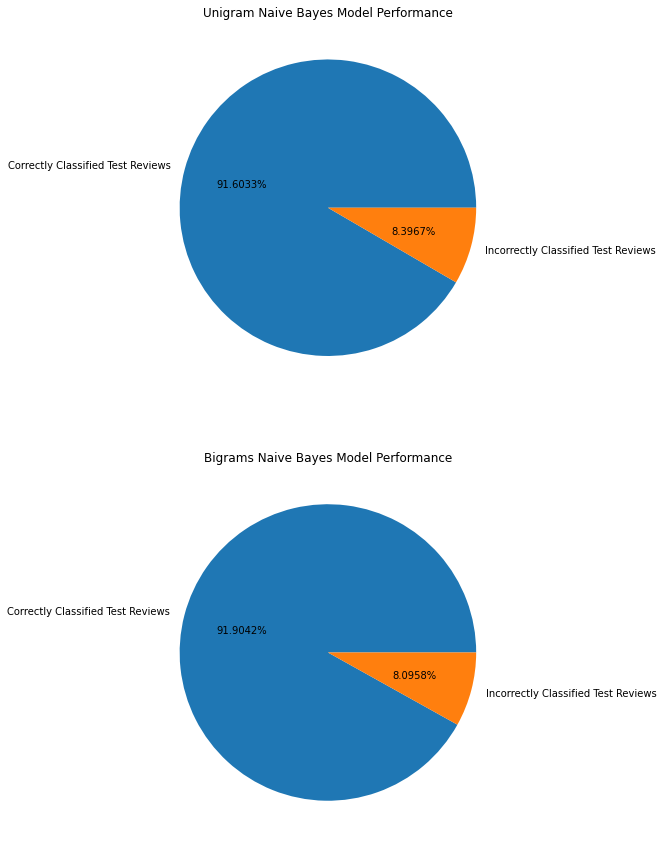

In [10]:
#Lets create two pie charts to visually show the performance of the two models
fig, ax = plt.subplots(2, figsize = (15,15))

#this function is used for displaying the percentage values onto the pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.4f}%".format(pct, absolute)
data = [nb.measure_test_accuracy(pred_labels)*100, 100-nb.measure_test_accuracy(pred_labels)*100]
ax[0].pie(data, labels = ['Correctly Classified Test Reviews', 'Incorrectly Classified Test Reviews'], autopct=lambda pct: func(pct, data))
ax[0].set_title("Unigram Naive Bayes Model Performance")
data2 = [nbb.measure_test_accuracy(bigrams_pred_labels)*len(bigrams_pred_labels), len(bigrams_pred_labels)-nbb.measure_test_accuracy(bigrams_pred_labels)*len(bigrams_pred_labels)]
ax[1].pie(data2, labels = ['Correctly Classified Test Reviews', 'Incorrectly Classified Test Reviews'], autopct=lambda pct: func(pct, data2))
ax[1].set_title("Bigrams Naive Bayes Model Performance")


Now, let's consider the errors of the two models and see what percentage of them were false positives and what percentage were false negatives, the two types of errors in this case.


Text(0.5, 1.0, 'Distribution of Errors of the Bigram Model')

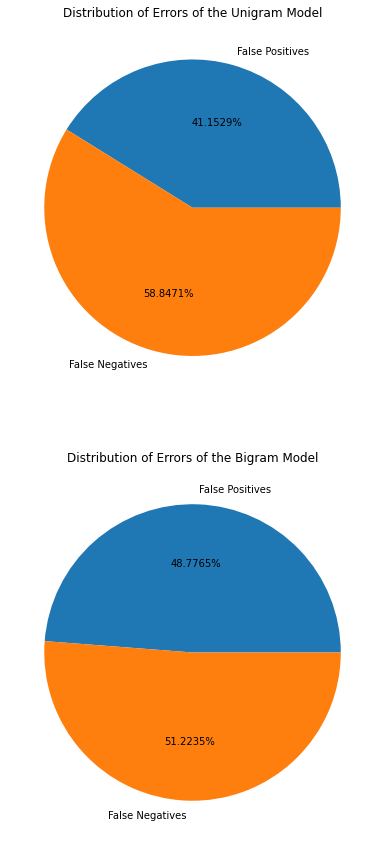

In [11]:
#this function will return the number of false positives (actually negative but classified as positive) and false negatives
def classify_errors(pred, actual):
  false_pos = 0
  false_neg = 0 #variables to hold false positive and negatives
  for idx in range(len(pred)):
    if pred[idx] != actual[idx]:
      if pred[idx] == 1 and actual[idx] == 0: #if the review was predicted to be positive but was actually negative, it is a false positive
        false_pos += 1
      else: #else an error has to be a false negative
        false_neg += 1
  return [false_pos, false_neg]

fig, ax = plt.subplots(2, figsize = (15,15))

#this function is used for displaying the percentage values onto the pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.4f}%".format(pct, absolute)
data = classify_errors(pred_labels, test_labels)
ax[0].pie(data, labels = ['False Positives', 'False Negatives'], autopct=lambda pct: func(pct, data))
ax[0].set_title("Distribution of Errors of the Unigram Model")

data = classify_errors(bigrams_pred_labels, test_labels)
ax[1].pie(data, labels = ['False Positives', 'False Negatives'], autopct=lambda pct: func(pct, data))
ax[1].set_title("Distribution of Errors of the Bigram Model")

Note that the Bigram Model had a more even distribution of False Positives and False Negatives. It may be useful to use the Bigram Model over the Unigram model if you desire this. Otherwise if you want to lower the chance of a False Positive Error, a Unigram model may be preferred over the Bigram Model depending on the application.


To summarize, the Unigram Naive Bayes Model had an accuracy of 91.6% and the Bigram Naive Bayes Model had an accuracy of 91.9% in the test set. Both models were trainined with the training set of 53509 reviews. These high accuracy values indicate that a Naive Bayes, Bag-of-Words (BOW) model, either a unigram or a bigram one, is an accurate and promising method of developing a classifer to predict the sentiment of a review based on the words that are present in the incoming review, especially when it is considered that there were 53509 reviews to be classified in the test set.

Something to continue this project further could be combining the unigram and bigram models into a mixed model, where the posterior probabilities are calculated with a combination of the unigrams and bigrams that are in the review. This would be something interesting to explore. Something else that would be interesting to explore would be expanding the model to higher degrees of n-grams, such as tri-grams, 4-grams, etc, and perhaps using them in combination with unigrams and bigrams in a mixed model.

Some other considerations which make Naive Bayes a good methodology for developing probabilistic classifiers are: naive Bayes models are very efficient to train using Supervised Learning (when the data is labeled), as several assumptions (like that of conditional independence) significantly simply the mathematics of the Naive Bayes Classifier. Even so, Naive Bayes classifiers continue to perform quite well in real-world situations and are an easy method of classifying labelled data.


---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

You will also receive the links and instructions to do the peer reviews.

Please review the metadata:

In [12]:
def get_metadata():
  meta = {
          "title": PROJECT_TITLE, # keep this as is
          "nb_id": NOTEBOOK_ID,   # keep this as is


          "data": ['https://drive.google.com/uc?export=download&id=1RsgcXIi7zew3cMkAskwpJjNtrilOOeGM'], #import the data

          # permissions
          # do you give the instructor the permission to copy this project
          # and allow others to view it in the class gallery?
          "allow_gallery": True,
          
          # if your project is made viewable to others,
          # do you want to include your name (first/last)?
          "allow_name_release": True
          }
  return meta

Specific instructions will come for what to submit for the various milestones.

If necessary, you can download the Python version of this notebook by using the `File->Download .py` as well as the notebook itself `File->Download .ipynb`.

